In [1]:
import os
for dirname, _, filenames in os.walk('C:\\Users\\Гильманов\\Documents\\Python Projects\\Other'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Гильманов\Documents\Python Projects\Other\amazon-sales-clean-eda-sentiment-analysis.ipynb
C:\Users\Гильманов\Documents\Python Projects\Other\amazon-sales-dataset-eda.ipynb
C:\Users\Гильманов\Documents\Python Projects\Other\amazon.csv
C:\Users\Гильманов\Documents\Python Projects\Other\bayazed.ipynb
C:\Users\Гильманов\Documents\Python Projects\Other\for Denis.ipynb
C:\Users\Гильманов\Documents\Python Projects\Other\model_full.pth
C:\Users\Гильманов\Documents\Python Projects\Other\.ipynb_checkpoints\amazon-sales-dataset-eda-checkpoint.ipynb
C:\Users\Гильманов\Documents\Python Projects\Other\.ipynb_checkpoints\bayazed-checkpoint.ipynb
C:\Users\Гильманов\Documents\Python Projects\Other\.ipynb_checkpoints\for Denis-checkpoint.ipynb


# **INTRODUCTION**

This dataset consists **more than 1000 of real products with their identification number listed in the Amazon marketplace** specifically from the region India. I noticed the region due to the currency used in the dataset is Rupee India. My objective is to clean and prepare the data due to the raw data being very unorganized. I will then move on to finding insights about the data and try to elaborate in the form of visualization.

**If you find this notebook useful, please give it an upvote! Much appreciated!**

In [2]:
#Importing Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Importing Files

df = pd.read_csv('C:\\Users\\Гильманов\\Documents\\Python Projects\\Other\\Diplom\\amazon.csv')

# **DATA CLEANING & PREPARATION**

Before making analyzing the data, it is important to clean and prepare data. The methods used to clean and prepare the data are as listed below:

1. Changing Data Types of Columns from object to Floats
2. Filling in Missing Information
3. Checking For Duplicate Rows
4. Splitting Long Strings 
5. Creating Various New Columns

In [4]:
#Checking out First Few Rows

df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [5]:
#Checking Column Names

df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [6]:
#Checking Number of Rows and Columns

df.shape

(1465, 16)

In [7]:
#Checking Data Types for each Column

df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

Note that the currency being used in **Indian Rupee**.

In [8]:
#Changing the data type of discounted price and actual price

df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')


In [9]:
#Changing Datatype and values in Discount Percentage

df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')

df['discount_percentage'] = df['discount_percentage'] / 100

df['discount_percentage']

0       0.64
1       0.43
2       0.90
3       0.53
4       0.61
        ... 
1460    0.59
1461    0.25
1462    0.28
1463    0.26
1464    0.22
Name: discount_percentage, Length: 1465, dtype: float64

In [10]:
#Finding unusual string in the rating column

df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [11]:
#Inspecting the strange row

df.query('rating == "|"')


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [7]:
df.query('product_id == "B098NS6PVG"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
377,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,993","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/I/31zOsqQOAO...,https://www.amazon.in/Ambrane-Unbreakable-Char...
622,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


I went to the amazon page to get the rating and found that the product id of **B08L12N5H1 has a rating of 4**. So I am going to give the item rating a 4.0 as well.

Source: https://www.amazon.in/Eureka-Forbes-Vacuum-Cleaner-Washable/dp/B08L12N5H1

In [12]:
#Changing Rating Columns Data Type

df['rating'] = df['rating'].str.replace('|', '4.0').astype('float64')

In [13]:
#Changing Rating Column Data Type

df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

In [14]:
#Checking for Duplicates

duplicates = df.duplicated()
df[duplicates]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [15]:
#Checking Missing Values

df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [16]:
#Creating a new DataFrame with Selected Column

df1 = df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].copy()

In [17]:
#Splitting the Strings in the category column

catsplit = df['category'].str.split('|', expand=True)
catsplit

,0,1,2,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans,None,None,None


In [18]:
#Renaming category column

catsplit = catsplit.rename(columns={0:'category_1', 1:'category_2', 2:'category_3'})

In [19]:
#Adding categories to the new dataframe

df1['category_1'] = catsplit['category_1']
df1['category_2'] = catsplit['category_2']

df1.drop(columns='category', inplace=True)

df1

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers&Accessories,Accessories&Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers&Accessories,Accessories&Peripherals
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers&Accessories,Accessories&Peripherals
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers&Accessories,Accessories&Peripherals
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers&Accessories,Accessories&Peripherals
...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,0.59,4.0,1090.0,Home&Kitchen,Kitchen&HomeAppliances
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,0.25,4.1,4118.0,Home&Kitchen,Kitchen&HomeAppliances
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,0.28,3.6,468.0,Home&Kitchen,"Heating,Cooling&AirQuality"
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,0.26,4.0,8031.0,Home&Kitchen,"Heating,Cooling&AirQuality"


In [20]:
#Checking category_1 unique values

df1['category_1'].value_counts()

category_1
Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

In [21]:
#Fixing Strings in the Category_1 Column

df1['category_1'] = df1['category_1'].str.replace('&', ' & ')
df1['category_1'] = df1['category_1'].str.replace('OfficeProducts', 'Office Products')
df1['category_1'] = df1['category_1'].str.replace('MusicalInstruments', 'Musical Instruments')
df1['category_1'] = df1['category_1'].str.replace('HomeImprovement', 'Home Improvement')


In [22]:
#Checking category_2 unique values

df1['category_2'].value_counts()

category_2
Accessories&Peripherals                    381
Kitchen&HomeAppliances                     308
HomeTheater,TV&Video                       162
Mobiles&Accessories                        161
Heating,Cooling&AirQuality                 116
WearableTechnology                          76
Headphones,Earbuds&Accessories              66
NetworkingDevices                           34
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
Cameras&Photography                         16
HomeStorage&Organization                    16
HomeAudio                                   16
GeneralPurposeBatteries&BatteryChargers     14
Accessories                                 14
Printers,Inks&Accessories                   11
CraftMaterials                               7
Components                                   5
OfficeElectronics                            4
Electrical                                   2
Monitors                                     2
Mi

In [23]:
#Fixing Strings in Category_2 column

df1['category_2'] = df1['category_2'].str.replace('&', ' & ')
df1['category_2'] = df1['category_2'].str.replace(',', ', ')
df1['category_2'] = df1['category_2'].str.replace('HomeAppliances', 'Home Appliances')
df1['category_2'] = df1['category_2'].str.replace('AirQuality', 'Air Quality')
df1['category_2'] = df1['category_2'].str.replace('WearableTechnology', 'Wearable Technology')
df1['category_2'] = df1['category_2'].str.replace('NetworkingDevices', 'Networking Devices')
df1['category_2'] = df1['category_2'].str.replace('OfficePaperProducts', 'Office Paper Products')
df1['category_2'] = df1['category_2'].str.replace('ExternalDevices', 'External Devices')
df1['category_2'] = df1['category_2'].str.replace('DataStorage', 'Data Storage')
df1['category_2'] = df1['category_2'].str.replace('HomeStorage', 'Home Storage')
df1['category_2'] = df1['category_2'].str.replace('HomeAudio', 'Home Audio')
df1['category_2'] = df1['category_2'].str.replace('GeneralPurposeBatteries', 'General Purpose Batteries')
df1['category_2'] = df1['category_2'].str.replace('BatteryChargers', 'Battery Chargers')
df1['category_2'] = df1['category_2'].str.replace('CraftMaterials', 'Craft Materials')
df1['category_2'] = df1['category_2'].str.replace('OfficeElectronics', 'Office Electronics')
df1['category_2'] = df1['category_2'].str.replace('PowerAccessories', 'Power Accessories')
df1['category_2'] = df1['category_2'].str.replace('CarAccessories', 'Car Accessories')
df1['category_2'] = df1['category_2'].str.replace('HomeMedicalSupplies', 'Home Medical Supplies')
df1['category_2'] = df1['category_2'].str.replace('HomeTheater', 'Home Theater')

In [24]:
# Removing Whitespace from product_id

df1['product_id'].str.strip()

0       B07JW9H4J1
1       B098NS6PVG
2       B096MSW6CT
3       B08HDJ86NZ
4       B08CF3B7N1
           ...    
1460    B08L7J3T31
1461    B01M6453MB
1462    B009P2LIL4
1463    B00J5DYCCA
1464    B01486F4G6
Name: product_id, Length: 1465, dtype: object

In [25]:
#Creating Categories for Rankings

rating_score = []

for score in df1['rating']:
    if score < 2.0 : rating_score.append('Poor')
    elif score < 3.0 : rating_score.append('Below Average')
    elif score < 4.0 : rating_score.append('Average')
    elif score < 5.0 : rating_score.append('Above Average')
    elif score == 5.0 : rating_score.append('Excellent')

Created a a **Rating Category** that consists of:

**1.  Score below 2.0 = Poor**

**2.  Score range of 2.0 - 2.9 = Below Average**

**3.  Score range of 3.0 - 3.9 = Average**

**4.  Score Range of 4.0 - 4.9 = Above Averag**e

**5.  Score of 5.0 = Excellent**

In [26]:
#Creating A new Column and Changing the Data Type

df1['rating_score'] = rating_score

df1['rating_score'] = df1['rating_score'].astype('category')

In [27]:
#Reordered Categories

df1['rating_score'] = df1['rating_score'].cat.reorder_categories(['Below Average', 'Average', 'Above Average', 'Excellent'], ordered=True)

In [28]:
#Creating Difference of Price Column between Actual Price and Discounted Price

df1['difference_price'] = df1['actual_price'] - df1['discounted_price']

In [29]:
#Result After Cleaning and Preperation after first cleaned dataframe

df1.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2,rating_score,difference_price
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Above Average,700.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,Above Average,150.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals,Average,1700.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals,Above Average,370.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers & Accessories,Accessories & Peripherals,Above Average,245.0


In [30]:
#Subsetting Reviewers Identifications

reviewers = df[['user_id','user_name']]
reviewers

,user_id,user_name
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp..."
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac..."
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal..."
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ..."
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK..."
...,...,...
1460,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome..."
1461,"AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH..."
1462,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz..."
1463,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan..."


In [31]:
#Splitting the strings in user_id column

reviewer_id_split = reviewers['user_id'].str.split(',', expand=False)

reviewer_id_split

0       [AG3D6O4STAQKAY2UVGEUV46KN35Q, AHMY5CWJMMK5BJR...
1       [AECPFYFQVRUWC3KGNLJIOREFP5LQ, AGYYVPDD7YG7FYN...
2       [AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA, AESFLDV2PT363T2...
3       [AEWAZDZZJLQUYVOVGBEUKSLXHQ5A, AG5HTSFRRE6NL3M...
4       [AE3Q6KSUK5P75D5HFYHCRAOLODSA, AFUGIFH5ZAFXRDS...
                              ...                        
1460    [AHITFY6AHALOFOHOZEOC6XBP4FEA, AFRABBODZJZQB6Z...
1461    [AFG5FM3NEMOL6BNFRV2NK5FNJCHQ, AGEINTRN6Z563RM...
1462    [AGVPWCMAHYQWJOQKMUJN4DW3KM5Q, AF4Q3E66MY4SR7Y...
1463    [AF2JQCLSCY3QJATWUNNHUSVUPNQQ, AFDMLUXC5LS5RXD...
1464    [AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA, AG7QNJ2SCS5VS5V...
Name: user_id, Length: 1465, dtype: object

In [32]:
#Making user id display 1 id per row

reviewer_id_exp = reviewer_id_split.explode()

reviewer_id_clean = reviewer_id_exp.reset_index(drop=True)

reviewer_id_clean

0        AG3D6O4STAQKAY2UVGEUV46KN35Q
1        AHMY5CWJMMK5BJRBBSNLYT3ONILA
2        AHCTC6ULH4XB6YHDY6PCH2R772LQ
3        AGYHHIERNXKA6P5T7CZLXKVPT7IQ
4        AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q
                     ...             
11498    AHXCDNSXAESERITAFELQABFVNLCA
11499    AGRZD6CHLCUNOLMMIMIHUCG7PIFA
11500    AFQZVGSOSOJHKFQQMCEI4725QEKQ
11501    AEALVGXXIP46OZVXKRUXSDWZJMEA
11502    AGEFL3AY7YXEFZA4ZJU3LP7K7OJQ
Name: user_id, Length: 11503, dtype: object

In [33]:
#Splitting the strings in user_name column

reviewer_name_split = reviewers['user_name'].str.split(',', expand=False)

reviewer_name_split

0       [Manav, Adarsh gupta, Sundeep, S.Sayeed Ahmed,...
1       [ArdKn, Nirbhay kumar, Sagar Viswanathan, Asp,...
2       [Kunal, Himanshu, viswanath, sai niharka, saqi...
3       [Omkar dhale, JD, HEMALATHA, Ajwadh a., amar s...
4       [rahuls6099, Swasat Borah, Ajay Wadke, Pranali...
                              ...                        
1460    [Prabha ds, Raghuram bk, Real Deal, Amazon Cus...
1461    [Manu Bhai, Naveenpittu, Evatira Sangma, JAGAN...
1462    [Nehal Desai, Danish Parwez, Amazon Customer, ...
1463    [Shubham Dubey, E.GURUBARAN, Mayank S., eusuf ...
1464    [Rajib, Ajay B, Vikas Kahol, PARDEEP, Anindya ...
Name: user_name, Length: 1465, dtype: object

In [34]:
#Making user name display 1 id per row

review_name_exp = reviewer_name_split.explode()

reviewer_name_clean = review_name_exp.reset_index(drop=True)

reviewer_name_clean

0                   Manav
1            Adarsh gupta
2                 Sundeep
3          S.Sayeed Ahmed
4          jaspreet singh
               ...       
11510             PARDEEP
11511    Anindya Pramanik
11512         Vikas Singh
11513     Harshada Pimple
11514              Saw a.
Name: user_name, Length: 11515, dtype: object

In [35]:
#Creating 2 Data Frames to be merged

df21 = pd.DataFrame(data=reviewer_id_clean)
df22 = pd.DataFrame(data=reviewer_name_clean)


In [36]:
#Merging the 2 dataframe containing user_id and user_name

df2 = pd.merge(df21, df22, left_index=True, right_index=True)

In [37]:
#Final Check for the new dataframe

df2.head()

,user_id,user_name
0,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav
1,AHMY5CWJMMK5BJRBBSNLYT3ONILA,Adarsh gupta
2,AHCTC6ULH4XB6YHDY6PCH2R772LQ,Sundeep
3,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,S.Sayeed Ahmed
4,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,jaspreet singh


# **DATA EXPLORATION**

In this stage I will try to elaborate my insights through Visualizations, Pivot Tables, and short explanations.

In [38]:
#Setting Visualization Style

sns.set_style(style='darkgrid')

sns.set_palette(palette="icefire")

## **Observation 1: Product Category**

Below are the list of **Main Category** and **Sub-Category** to help determine which sub-category belongs to which main category:

In [39]:
#Main Category and Sub-Category

main_sub = df1[['category_1', 'category_2', 'product_id']]

main_sub = main_sub.rename(columns={'category_1' :'Main Category', 'category_2' : 'Sub-Category', 'product_id':'Product ID'})

main_sub_piv = pd.pivot_table(main_sub, index=['Main Category', 'Sub-Category'], aggfunc='count')

main_sub_piv

Product ID
Main Category           Sub-Category                                            
Car & Motorbike         Car Accessories                                        1
Computers & Accessories Accessories & Peripherals                            381
                        Components                                             5
                        External Devices & Data Storage                       18
                        Laptops                                                1
                        Monitors                                               2
                        Networking Devices                                    34
                        Printers, Inks & Accessories                          11
                        Tablets                                                1
Electronics             Accessories                                           14
                        Cameras & Photography                                 16
                        General Purpose Batteries & Battery Chargers          14
                        Headphones, Earbuds & Accessories                     66
                        Home Audio                                            16
                        Home Theater, TV & Video                             162
                        Mobiles & Accessories                                161
                        Power Accessories                                      1
                        Wearable Technology                                   76
Health & PersonalCare   Home Medical Supplies & Equipment                      1
Home & Kitchen          Craft Materials                                        7
                        Heating, Cooling & Air Quality                       116
                        Home Storage & Organization                           16
                        Kitchen & Dining                                       1
                        Kitchen & Home Appliances                            308
Home Improvement        Electrical                                             2
Musical Instruments     Microphones                                            2
Office Products         Office Electronics                                     4
                        Office Paper Products                                 27
Toys & Games            Arts & Crafts                                          1

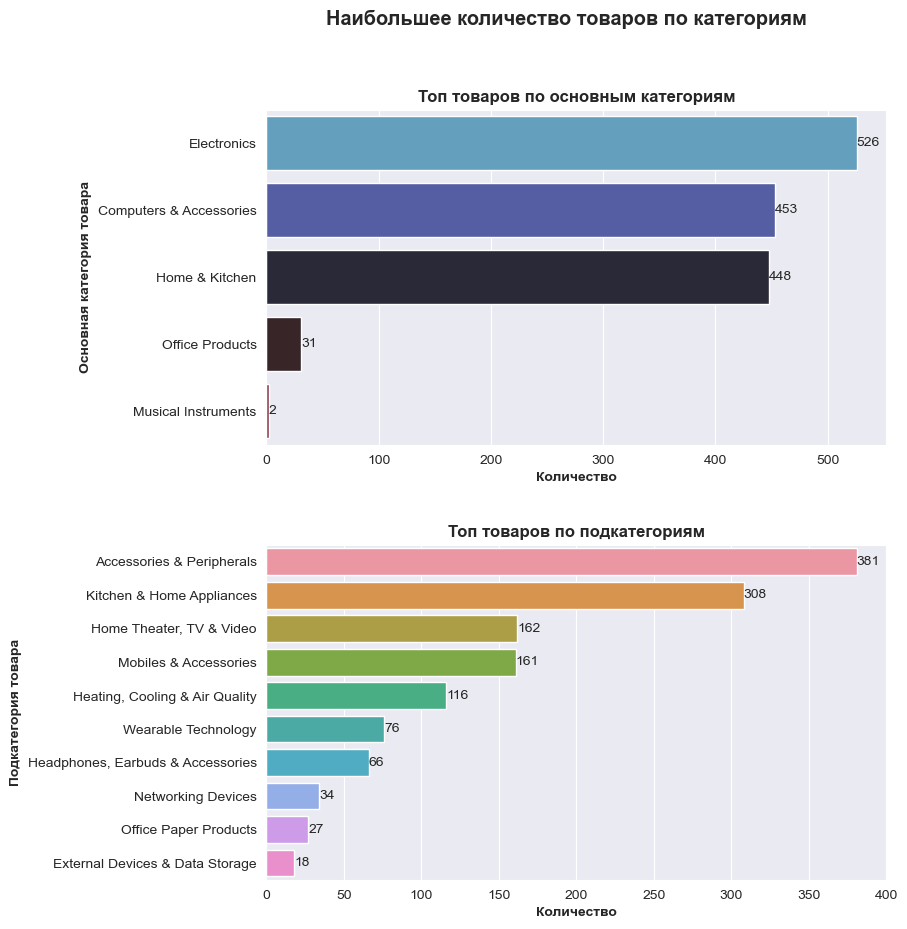

In [46]:
#Most amount of products by category

most_main_items = df1['category_1'].value_counts().head(5).rename_axis('category_1').reset_index(name='counts')

most_sub_items = df1['category_2'].value_counts().head(10).rename_axis('category_2').reset_index(name='counts')

fig, ax = plt.subplots(2, 1, figsize=(8, 10))
fig.suptitle('Наибольшее количество товаров по категориям', fontweight='heavy', size='x-large')

sns.barplot(ax=ax[0], data=most_main_items, x='counts', y='category_1')
sns.barplot(ax=ax[1], data=most_sub_items, x='counts', y='category_2')

plt.subplots_adjust(hspace = 0.3)

ax[0].set_xlabel('Количество', fontweight='bold')
ax[0].set_ylabel('Основная категория товара', fontweight='bold')

ax[1].set_xlabel('Количество', fontweight='bold')
ax[1].set_ylabel('Подкатегория товара', fontweight='bold')

ax[0].set_title('Топ товаров по основным категориям', fontweight='bold')
ax[1].set_title('Топ товаров по подкатегориям', fontweight='bold')


ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

plt.show()


**Electronics especially acccessories & peripherals and kitchen & home appliances covers most of the products** in this dataset. In general, this dataset contains mostly products closely related to electric devices.

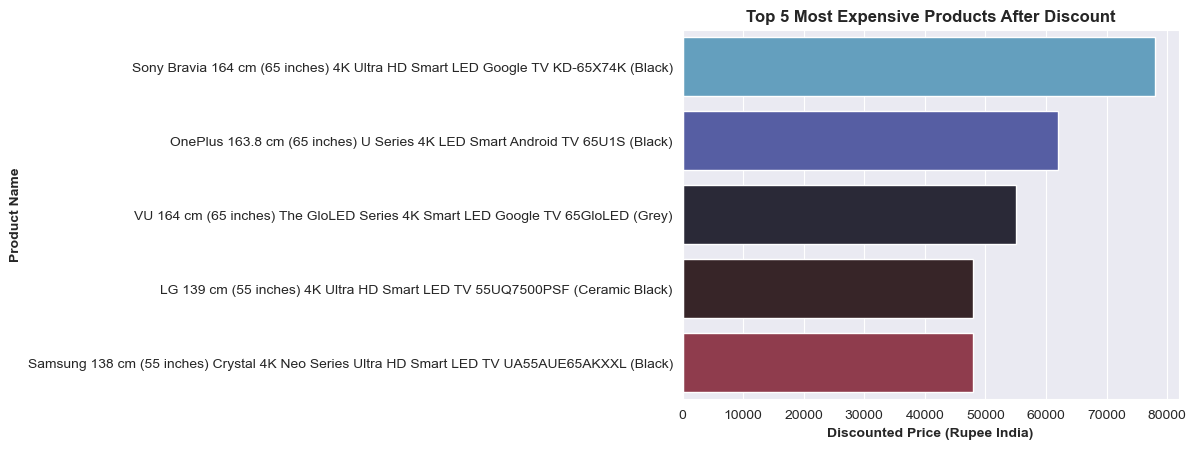

In [41]:
#Top 5 Most Expensive Products After Discount

disc_exp = sns.barplot(data=df1.sort_values('discounted_price', ascending=False).head(5), x='discounted_price', y='product_name')

disc_exp.set_title('Top 5 Most Expensive Products After Discount', fontweight='bold')
disc_exp.set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
disc_exp.set_ylabel('Product Name', fontweight='bold')

plt.show()

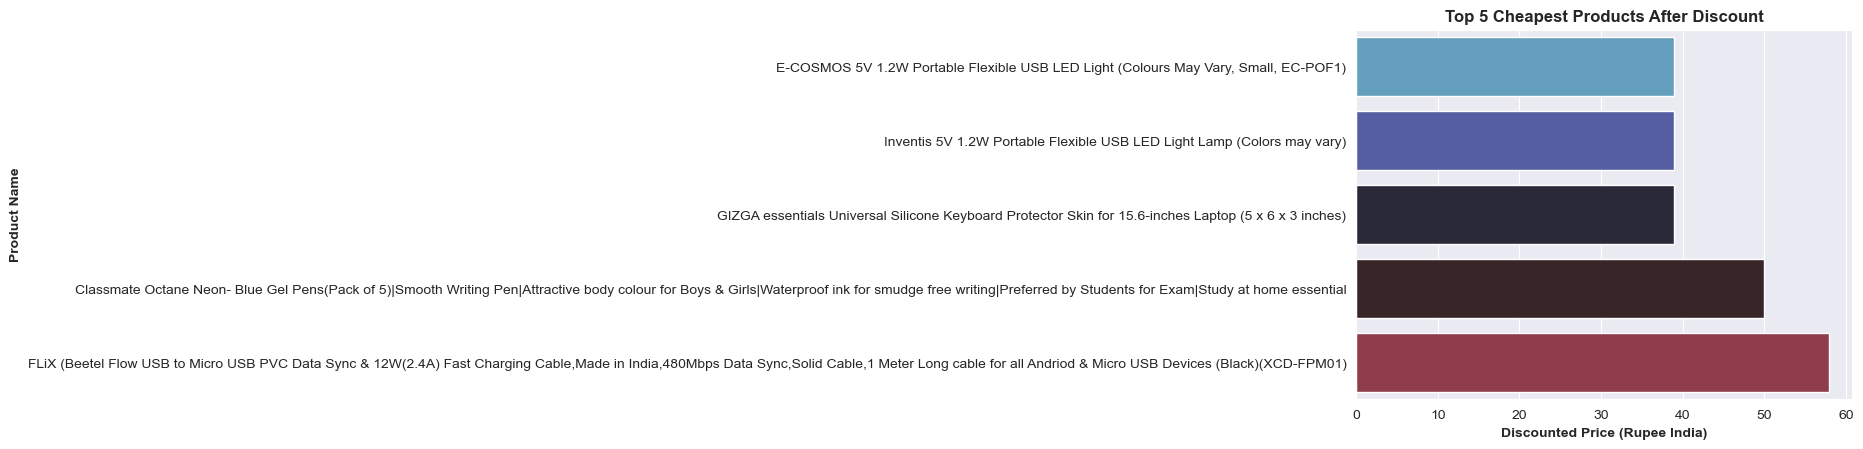

In [42]:
#Top 5 Cheapest Products After Discount

disc_cheap = sns.barplot(data=df1.sort_values('discounted_price').head(5), x='discounted_price', y='product_name')

disc_cheap.set_title('Top 5 Cheapest Products After Discount', fontweight='bold')
disc_cheap.set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
disc_cheap.set_ylabel('Product Name', fontweight='bold')

plt.show()

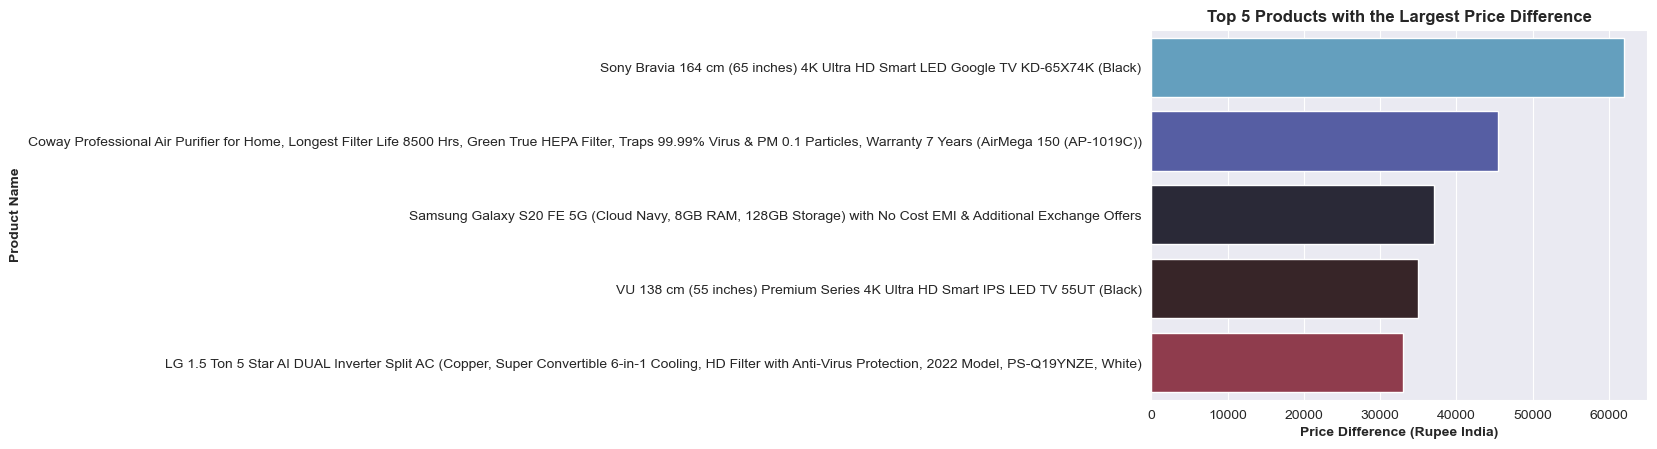

In [43]:
#Top 5 Products with the largest difference in price due to discount

dif_price_large = sns.barplot(data= df1.sort_values('difference_price', ascending=False).head(5), x='difference_price', y='product_name')

dif_price_large.set_title('Top 5 Products with the Largest Price Difference', fontweight='bold')
dif_price_large.set_xlabel('Price Difference (Rupee India)', fontweight='bold')
dif_price_large.set_ylabel('Product Name', fontweight='bold')

plt.show()

## **Observation 2: Correlation between Features**

ValueError: could not convert string to float: 'B07JW9H4J1'

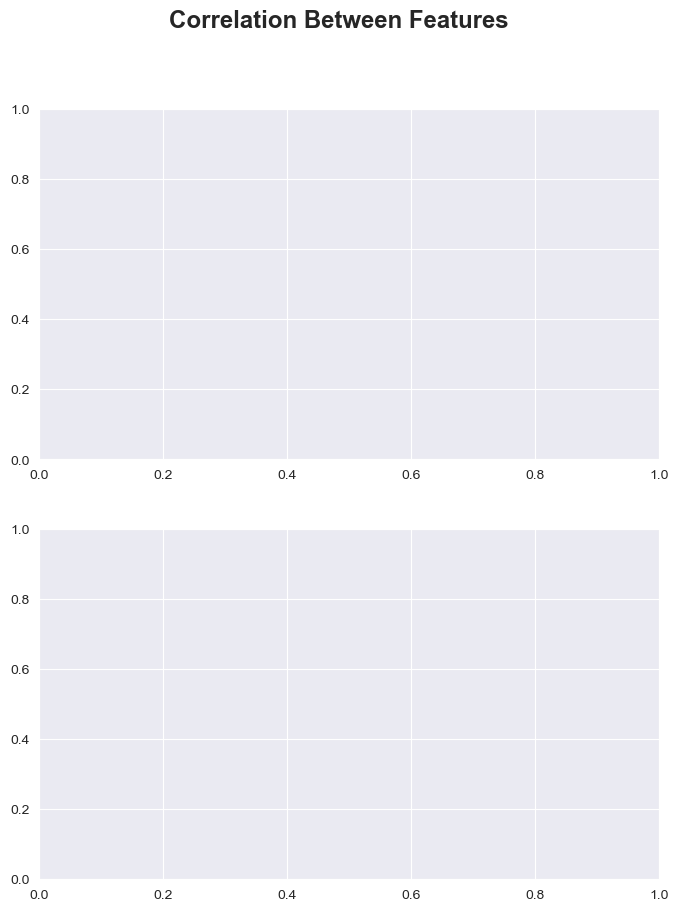

In [44]:
#Heatmap & Correlation between Actual Price & Discounted Price

fig, ax = plt.subplots(2, 1, figsize=(8, 10))

fig.suptitle('Correlation Between Features', fontweight='heavy', size='xx-large')

sns.heatmap(ax=ax[0], data=df1.corr())
sns.scatterplot(ax=ax[1], data=df1, y='discounted_price', x='actual_price', color='brown')

plt.subplots_adjust(hspace = 0.8)

ax[1].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[1].set_ylabel('Discounted Price (Rupee India)', fontweight='bold')

ax[0].set_title('Heatmap', fontweight='bold')
ax[1].set_title('Correlation between Actual Price & Discounted Price', fontweight='bold')

plt.show()

There are almost no correlation between the features in the dataset. Only the **actual prices of products and the discounted prices of products have a positive correlation**.

## **Observation 3: Product Ratings**

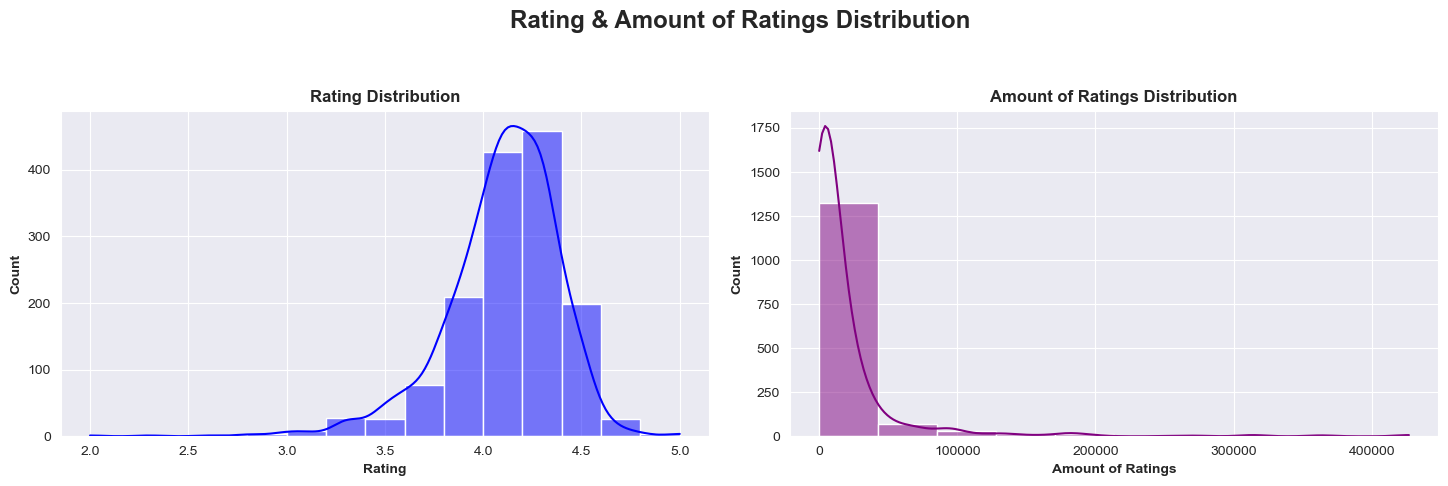

In [45]:
#Rating & Amount of Rating Distribution

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Rating & Amount of Ratings Distribution', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=3.0)

sns.histplot(ax=ax[0], data=df1, x='rating', bins=15, kde=True, color='blue')
sns.histplot(ax=ax[1], data=df1, x='rating_count', bins=10, kde=True, color='purple')

ax[0].set_xlabel('Rating', fontweight='bold')
ax[1].set_xlabel('Amount of Ratings', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Rating Distribution', fontweight='bold')
ax[1].set_title('Amount of Ratings Distribution', fontweight='bold')

plt.show()

Most of the product rating range around **4.0 - 4.375** with **no products under the score of 2.0**. The rating distribution in **slightly left-skewed**. 

The amount of ratings given to a product is very widespread. Most of the products that have been rated, have around **0 - 5000 amount of rating** for each product. Interestingly there are products that have more than 40,000 ratings. The amount of **ratings distribution is highly right skewed**.

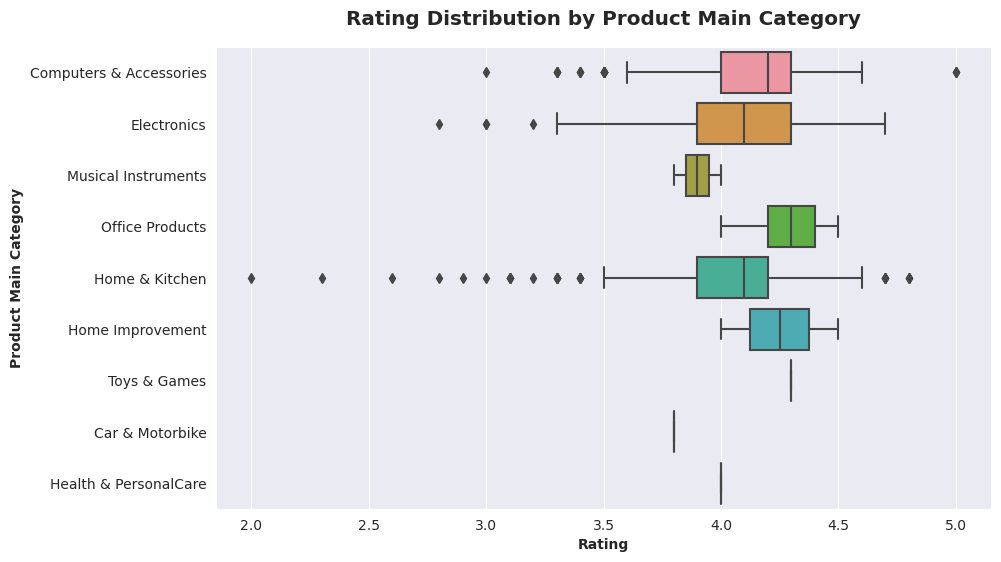

In [46]:
#Rating Distribution by Product Main Category

fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(ax=ax, data=df1, x='rating', y='category_1')

ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Rating Distribution by Product Main Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

**Toys & Games, Car & Motorbike, and Health & Personal Care** product ratings's are around **3.75 - 4.375**. **All Home Improvement, and Office Products** have a **minimal rating of 4.0**.

Many of the **Computer & Accessories, and Electronics** products have ratings in the range of  **3.6 - 4.6.** Though these categories do have products that have a high rating such as 5.0 and low rating, going down to 2.75.

Noticeably, the **Home & Kitchen products** have a really widespread rating going to as **high as 4.75** and going as **low as 2.0** rating, which is the lowest rating out of all the products in this dataset. However, most of the products in this category fall in the range of around **3.8 - 4.6**.

In [47]:
#Rating of Products based on Rating Category

rate_main_cat = df1.groupby(['category_1','rating_score']).agg('count').iloc[:,1].rename_axis().reset_index(name='Amount')

rate_main_cat = rate_main_cat.rename(columns = {'category_1' : 'Main Category', 'rating_score' : 'Rating Category'})

rate_main_cat

,Main Category,Rating Category,Amount
0,Car & Motorbike,Below Average,0
1,Car & Motorbike,Average,1
2,Car & Motorbike,Above Average,0
3,Car & Motorbike,Excellent,0
4,Computers & Accessories,Below Average,0
5,Computers & Accessories,Average,75
6,Computers & Accessories,Above Average,375
7,Computers & Accessories,Excellent,3
8,Electronics,Below Average,1
9,Electronics,Average,132


Above is the list of the amount of products under specific ratings for each main category.

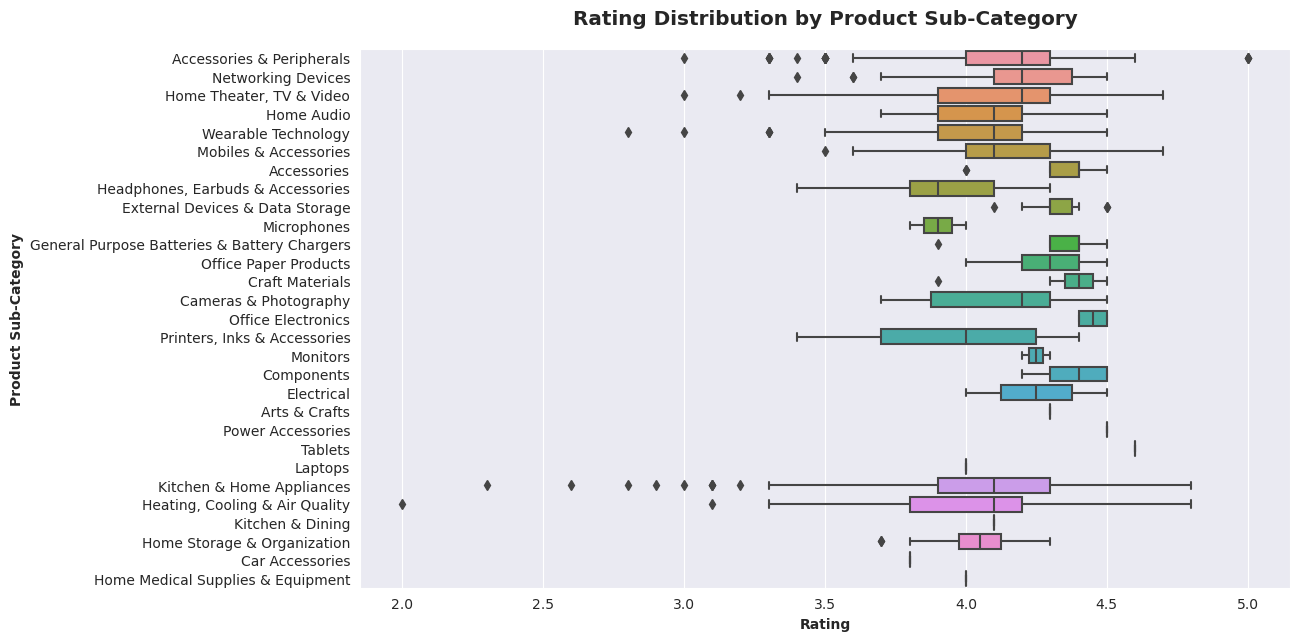

In [48]:
#Rating Distribution by Product Sub-Category

fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(ax=ax, data=df1, x='rating', y='category_2')

ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Product Sub-Category', fontweight='bold')
ax.set_title('Rating Distribution by Product Sub-Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

In the *Rating Distribution by Product Sub-Category* graph, I have noticed that the **highest rated product** comes from the sub category of **Accessories & Peripherals**. The **lowest rated product** comes from the sub category of **Heating, Cooling & Air Quality**. 



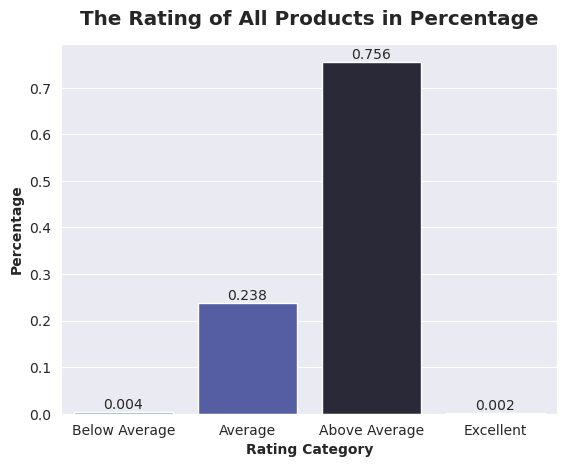

In [49]:
#The Rating of All Products in Percentage

rating_ordered = ['Below Average', 'Average', 'Above Average', 'Excellent']

rating_count = df1['rating_score'].value_counts(normalize=True).rename_axis('rating').reset_index(name='counts')

rating_count['counts'] = rating_count['counts'].round(3)

rating_count_plot = sns.barplot(data=rating_count, x='rating', y='counts', order=rating_ordered)

rating_count_plot.set_xlabel('Rating Category', fontweight='bold')
rating_count_plot.set_ylabel('Percentage', fontweight='bold')
rating_count_plot.set_title('The Rating of All Products in Percentage', fontweight='heavy', size='x-large', y=1.03)


rating_count_plot.bar_label(rating_count_plot.containers[0])

plt.show()

**Most of the products** in this dataset have been rated **Above Average**. There are **extremely few products** that are rated **Below Average and Excellent**. **No products are rated as Poor** in this dataset. 

In [50]:
#Pivot table of Rating

def p25(g):
    return np.percentile(g, 25)

def p75(g):
    return np.percentile(g, 75)

rating_pivot = df1.pivot_table(values=['rating', 'rating_count'], index=['category_1', 'category_2'], aggfunc=([p25, np.median, np.mean, p75]))

rating_pivot = rating_pivot.rename(columns = {'rating':'Rating', 'rating_count': 'Rating Count', 'median':'Median', 'mean':'Mean'}, index={'category_1': 'Main Category', 'category_2': 'Sub Category'})

rating_pivot 

p25  \
                                                                     Rating   
category_1              category_2                                            
Car & Motorbike         Car Accessories                               3.800   
Computers & Accessories Accessories & Peripherals                     4.000   
                        Components                                    4.300   
                        External Devices & Data Storage               4.300   
                        Laptops                                       4.000   
                        Monitors                                      4.225   
                        Networking Devices                            4.100   
                        Printers, Inks & Accessories                  3.700   
                        Tablets                                       4.600   
Electronics             Accessories                                   4.300   
                        Cameras & Photography                         3.875   
                        General Purpose Batteries & Battery Chargers  4.300   
                        Headphones, Earbuds & Accessories             3.800   
                        Home Audio                                    3.900   
                        Home Theater, TV & Video                      3.900   
                        Mobiles & Accessories                         4.000   
                        Power Accessories                             4.500   
                        Wearable Technology                           3.900   
Health & PersonalCare   Home Medical Supplies & Equipment             4.000   
Home & Kitchen          Craft Materials                               4.350   
                        Heating, Cooling & Air Quality                3.800   
                        Home Storage & Organization                   3.975   
                        Kitchen & Dining                              4.100   
                        Kitchen & Home Appliances                     3.900   
Home Improvement        Electrical                                    4.125   
Musical Instruments     Microphones                                   3.850   
Office Products         Office Electronics                            4.400   
                        Office Paper Products                         4.200   
Toys & Games            Arts & Crafts                                 4.300   

                                                                                   \
                                                                     Rating Count   
category_1              category_2                                                  
Car & Motorbike         Car Accessories                                   1118.00   
Computers & Accessories Accessories & Peripherals                             NaN   
                        Components                                        2515.00   
                        External Devices & Data Storage                  19747.50   
                        Laptops                                            323.00   
                        Monitors                                          2166.25   
                        Networking Devices                               10281.75   
                        Printers, Inks & Accessories                      3435.50   
                        Tablets                                           2886.00   
Electronics             Accessories                                      67259.00   
                        Cameras & Photography                             5384.25   
                        General Purpose Batteries & Battery Chargers      1269.50   
                        Headphones, Earbuds & Accessories                 9881.75   
                        Home Audio                                        2625.75   
                        Home Theater, TV & Video                           426.50   
             

Above is the **specific data on ratings and the amount of rating** for each Main and Sub Category of Products from the dataset.

## **Observation 3: Reviewers**

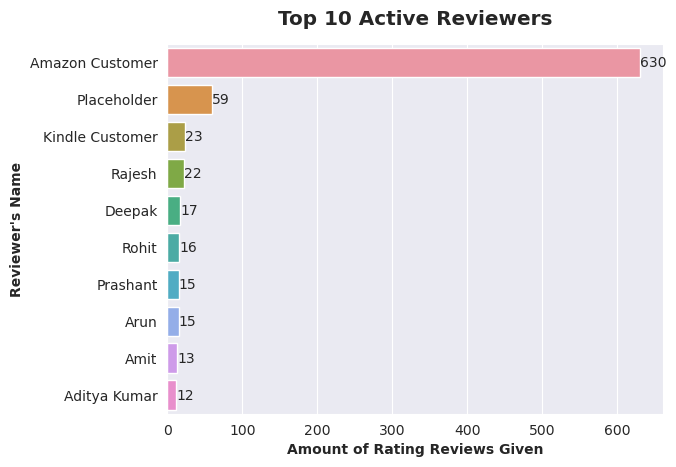

In [51]:
#Reviewers who gave ratings and reviews for more than one product

top_reviewer = data=df2['user_name'].value_counts().head(10).rename_axis('username').reset_index(name='counts')

top_review_plot = sns.barplot(data=top_reviewer, x='counts', y='username')

top_review_plot.bar_label(top_review_plot.containers[0])

top_review_plot.set_xlabel('Amount of Rating Reviews Given', fontweight='bold')
top_review_plot.set_ylabel("Reviewer's Name", fontweight='bold')
top_review_plot.set_title('Top 10 Active Reviewers', fontweight='heavy', size='x-large', y=1.03)

plt.show()


We can see that there are more than **500 people who reviewed a product and give rating anonymously** under the **alias of Amazon Customer, Place Holder, and Kindle Customer**.

There are **more than 8 people** who have given ratings and reviews to **more than 10 products** on this dataset. 

## **Observation 4: Product Pricing**

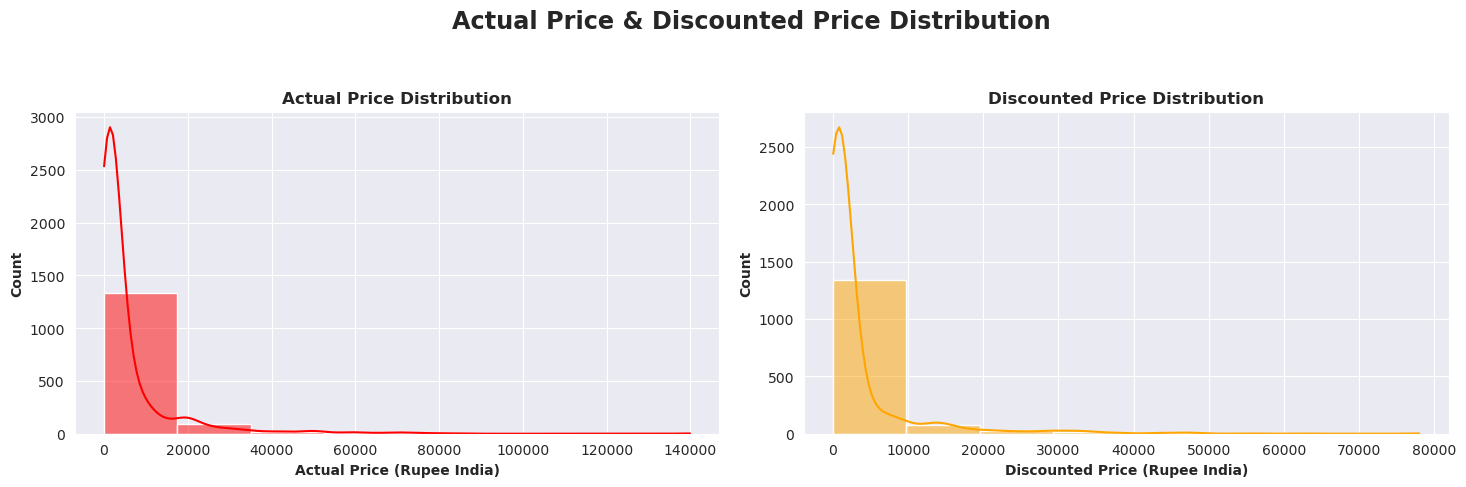

In [52]:
#Actual Price & Discounted Price Distribution

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Actual Price & Discounted Price Distribution', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=3.0)

sns.histplot(ax=ax[0], data=df1, x='actual_price', bins=8, kde=True, color='red')
sns.histplot(ax=ax[1], data=df1, x='discounted_price', bins=8, kde=True, color='orange')

ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Actual Price Distribution', fontweight='bold')
ax[1].set_title('Discounted Price Distribution', fontweight='bold')

plt.show()

Both graphs show the same distribution which is **Right or Positvely Skewed**.

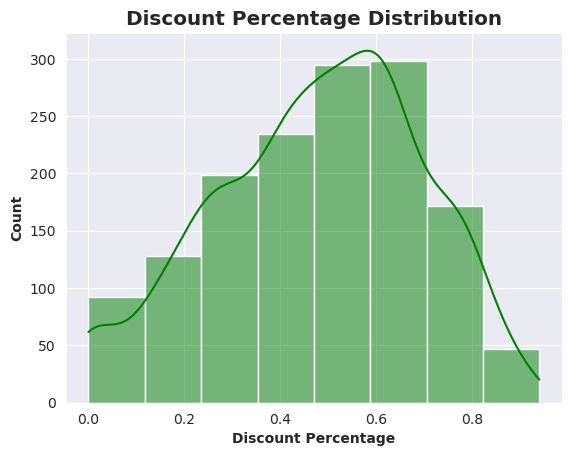

In [53]:
#Discount Percentage Distribution

disc_hist = sns.histplot(data=df1, x='discount_percentage', bins=8, kde=True, color='green')


disc_hist.set_xlabel('Discount Percentage', fontweight='bold')
disc_hist.set_ylabel('Count', fontweight='bold')
disc_hist.set_title('Discount Percentage Distribution', fontweight='heavy', size='x-large')

plt.show()

Most products on the dataset have discounts at around **50% - 70%**.

In [54]:
#Specific Details about the Discount Percentage

df1['discount_percentage'].describe()

count    1465.000000
mean        0.476915
std         0.216359
min         0.000000
25%         0.320000
50%         0.500000
75%         0.630000
max         0.940000
Name: discount_percentage, dtype: float64

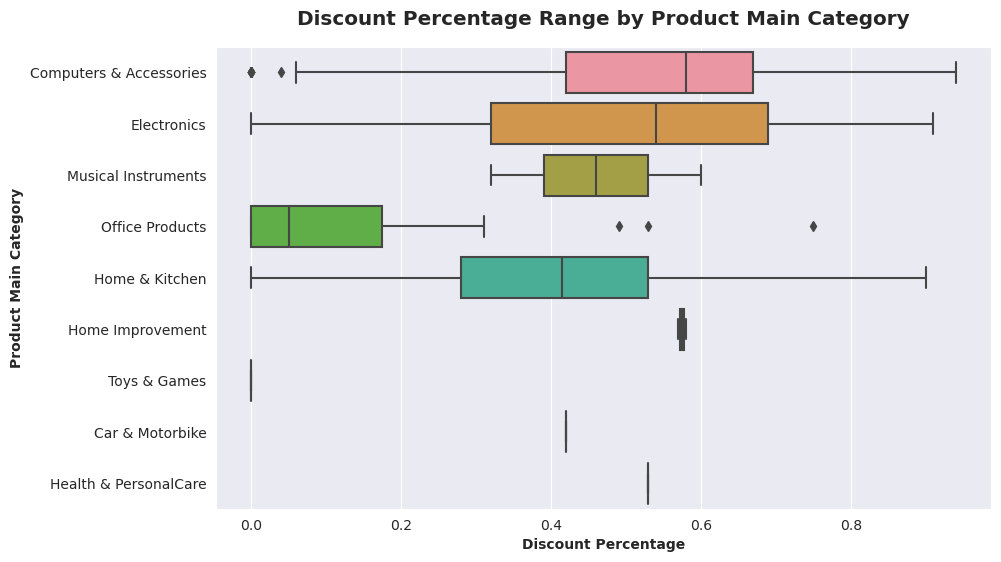

In [55]:
# The Discount Range by Product Main Category

fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df1, x='discount_percentage', y='category_1')

ax.set_xlabel('Discount Percentage', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Discount Percentage Range by Product Main Category', fontweight='heavy', size='x-large', y=1.03)


plt.show()


**Computers & Accessories, Electronics and Home & Kitchen** products have a **large spread of discount variation** ranging a minimal of 0% to more than 90% discount. 

**Toys & Games, Cars & Motorbikes, Health & Personal Care, and Home Improvement** have the **least spread** of discount variation.

**Office Products does not give a large amount of discount** compared to other products in the Main Category.

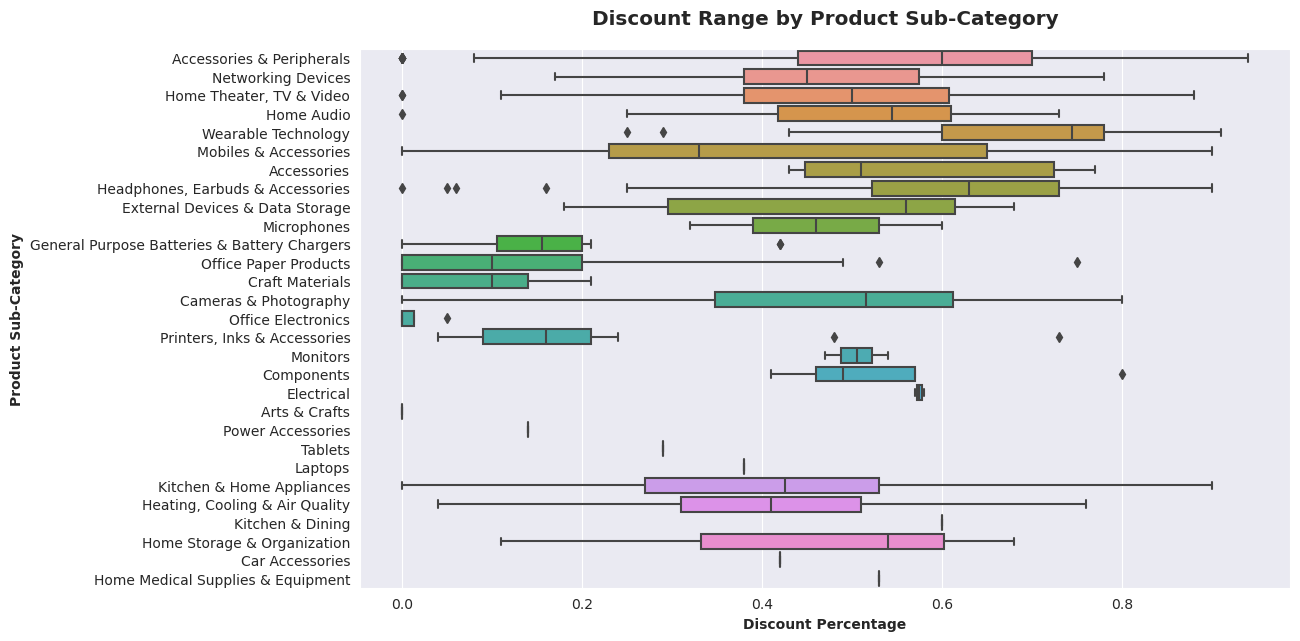

In [56]:
# The Discount Range by Product Sub-Category

fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(data=df1, x='discount_percentage', y='category_2')

ax.set_xlabel('Discount Percentage', fontweight='bold')
ax.set_ylabel('Product Sub-Category', fontweight='bold')
ax.set_title('Discount Range by Product Sub-Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

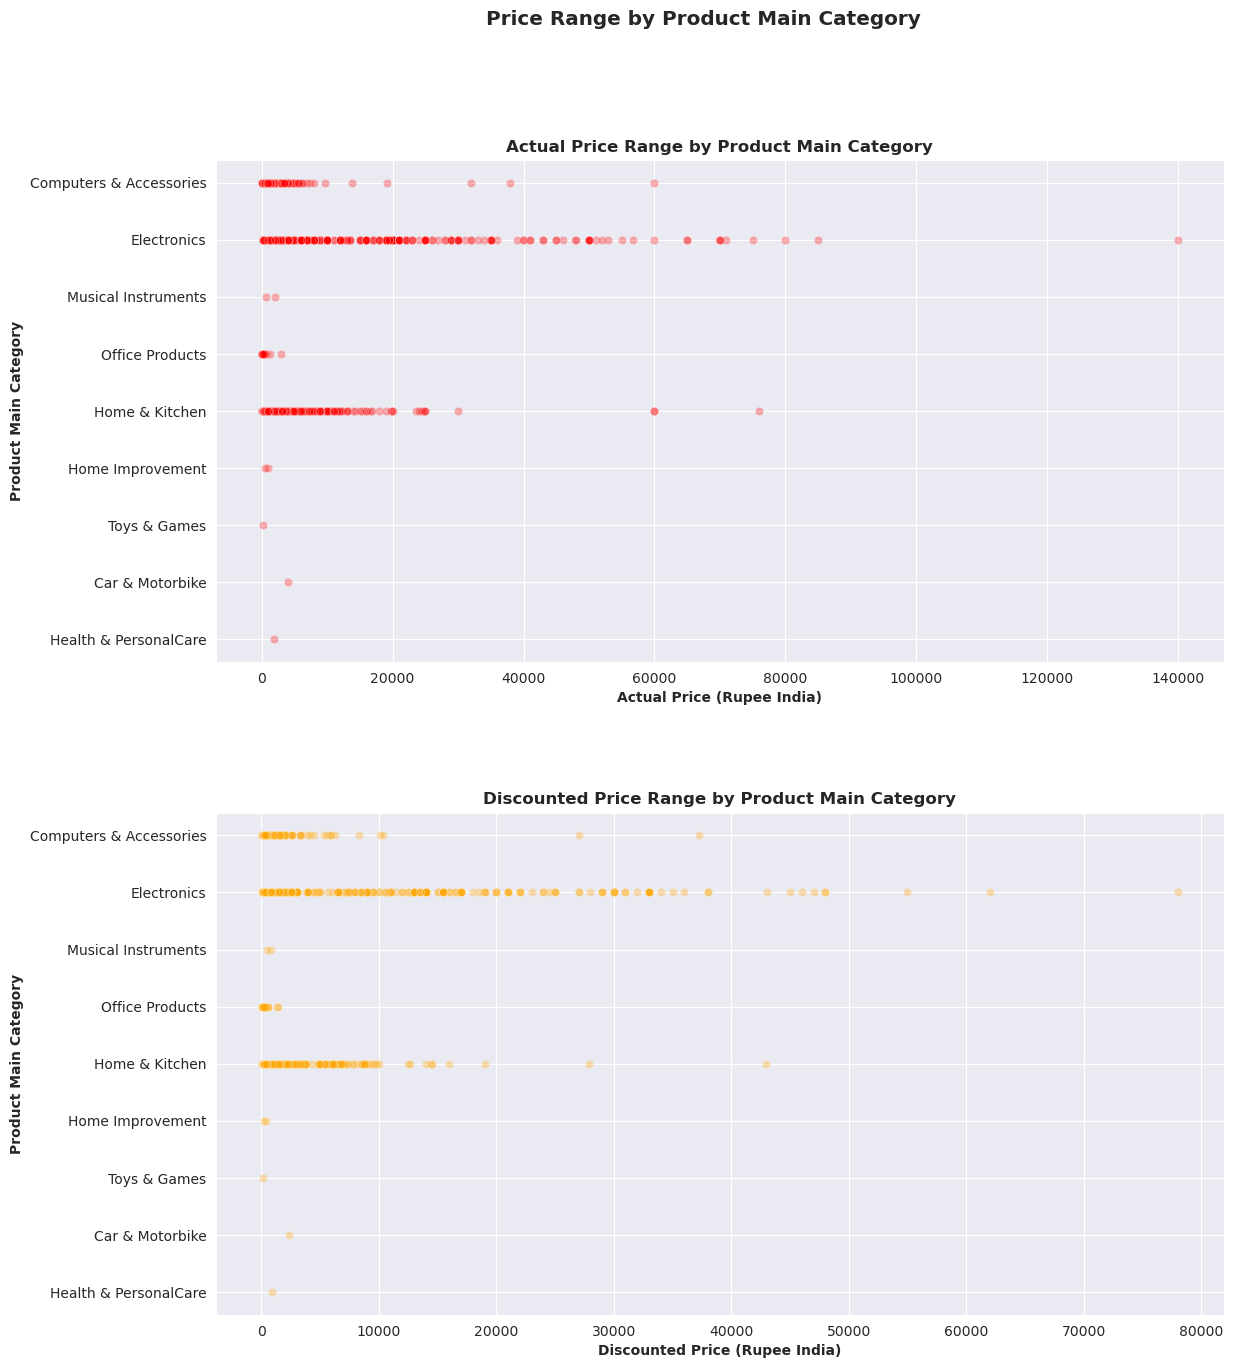

In [57]:
#Actual Price Range and Discounted Price Range by Product Main Category

fig, ax = plt.subplots(2, 1, figsize=(13,15))

fig.suptitle('Price Range by Product Main Category', fontweight='heavy', size='x-large')

sns.scatterplot(ax=ax[0], data=df1, x='actual_price', y='category_1', alpha=0.3, color='red')
sns.scatterplot(ax=ax[1], data=df1, x='discounted_price', y='category_1', alpha=0.3, color='orange')

ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[0].set_ylabel('Product Main Category', fontweight='bold')
ax[0].set_title('Actual Price Range by Product Main Category', fontweight='bold')

ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
ax[1].set_ylabel('Product Main Category', fontweight='bold')
ax[1].set_title('Discounted Price Range by Product Main Category', fontweight='bold')

plt.subplots_adjust(hspace = 0.3)

plt.show()

There is a significant decrease in price after discount especially in the Electronics Category. Most of the **product's actual price falls below 20,000 Rupee**. For the **discounted price**, most of the **products fall under 10,000 Rupee**.

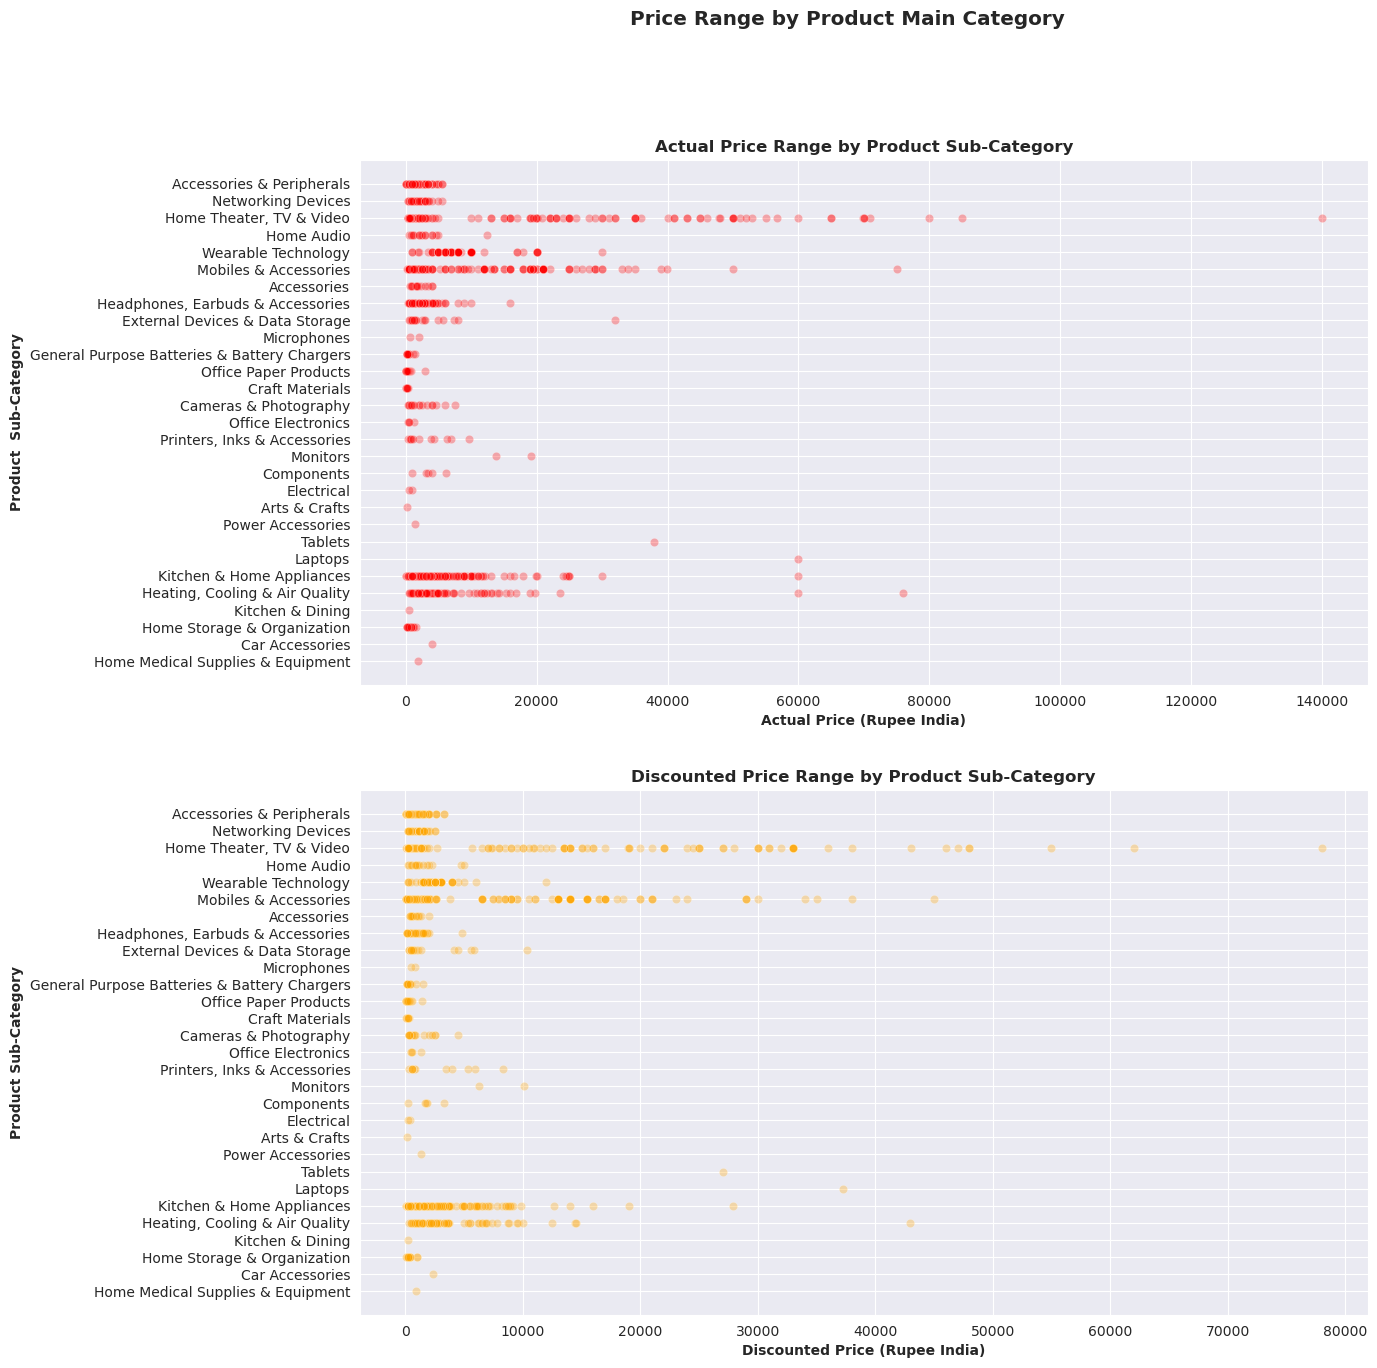

In [58]:
#Actual Price Range and Discounted Price Range by Product Sub Category

fig, ax = plt.subplots(2, 1, figsize=(13, 15))

fig.suptitle('Price Range by Product Main Category', fontweight='heavy', size='x-large')

sns.scatterplot(ax=ax[0], data=df1, x='actual_price', y='category_2', alpha=0.3, color='red')
sns.scatterplot(ax=ax[1], data=df1, x='discounted_price', y='category_2', alpha=0.3, color='orange')

ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[0].set_ylabel('Product  Sub-Category', fontweight='bold')
ax[0].set_title('Actual Price Range by Product Sub-Category', fontweight='bold')

ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
ax[1].set_ylabel('Product Sub-Category', fontweight='bold')
ax[1].set_title('Discounted Price Range by Product Sub-Category', fontweight='bold')

plt.subplots_adjust(hspace = 0.2)

plt.show()

In [59]:
#Pivot table of Prices

def p25(g):
    return np.percentile(g, 25)

def p75(g):
    return np.percentile(g, 75)

actual_price_pivot = df1.pivot_table(values=['actual_price', 'discounted_price'], index=['category_1', 'category_2'], aggfunc=([p25, np.median, np.mean, p75]))

actual_price_pivot

p25  \
                                                                     actual_price   
category_1              category_2                                                  
Car & Motorbike         Car Accessories                                   4000.00   
Computers & Accessories Accessories & Peripherals                          499.00   
                        Components                                        3100.00   
                        External Devices & Data Storage                   1074.25   
                        Laptops                                          59890.00   
                        Monitors                                         15090.00   
                        Networking Devices                                1208.00   
                        Printers, Inks & Accessories                       811.00   
                        Tablets                                          37999.00   
Electronics             Accessories                                       1150.00   
                        Cameras & Photography                              946.00   
                        General Purpose Batteries & Battery Chargers       205.00   
                        Headphones, Earbuds & Accessories                  999.00   
                        Home Audio                                        1274.00   
                        Home Theater, TV & Video                           824.00   
                        Mobiles & Accessories                             1299.00   
                        Power Accessories                                 1499.00   
                        Wearable Technology                               5999.00   
Health & PersonalCare   Home Medical Supplies & Equipment                 1900.00   
Home & Kitchen          Craft Materials                                    132.50   
                        Heating, Cooling & Air Quality                    1990.00   
                        Home Storage & Organization                        374.00   
                        Kitchen & Dining                                   495.00   
                        Kitchen & Home Appliances                         1000.00   
Home Improvement        Electrical                                         699.00   
Musical Instruments     Microphones                                       1023.00   
Office Products         Office Electronics                                 511.25   
                        Office Paper Products                              120.00   
Toys & Games            Arts & Crafts                                      150.00   

                                                                                       \
                                                                     discounted_price   
category_1              category_2                                                      
Car & Motorbike         Car Accessories                                       2339.00   
Computers & Accessories Accessories & Peripherals                              199.00   
                        Components                                            1709.00   
                        External Devices & Data Storage                        504.00   
                        Laptops                                              37247.00   
                        Monitors                                              7249.00   
                        Networking Devices                                     530.00   
                        Printers, Inks & Accessories                           597.00   
                        Tablets                                              26999.00   
Electronics             Accessories                                            479.00   
                        Cameras & Photography                                  386.50   
                        General Purpose Batteries & Battery Chargers           166.75   
                      

category_1 refers to the Main Category

category_2 refers to the Sub-Category

# **Predicting Discounted Price of Products**

I will attempt to make a Simple Linear Regression Model. The **Independent Varaible will be the Actual Price** and the **Dependent Variable will be Discounted Price.**

In [60]:
#Extracting Independent and Dependent Variables

X = df1.iloc[:, 3].values.reshape(-1, 1)
y = df1.iloc[:, 2].values.reshape(-1, 1)

In [61]:
#Splitting the dataset into the Training Set and Test Set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [62]:
#Fitting Simple Linear Regression to the Training Set

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [63]:
#Calculating the Coefficients

reg.coef_

array([[0.60066987]])

In [64]:
#Calculating the Intercept

reg.intercept_

array([-167.20433789])

In [65]:
#Calculating the R Squared Value

from sklearn.metrics import r2_score
y_pred = reg.predict(X_test)
print('R2 Score: ', r2_score(y_test, y_pred))

R2 Score:  0.9224573166916071


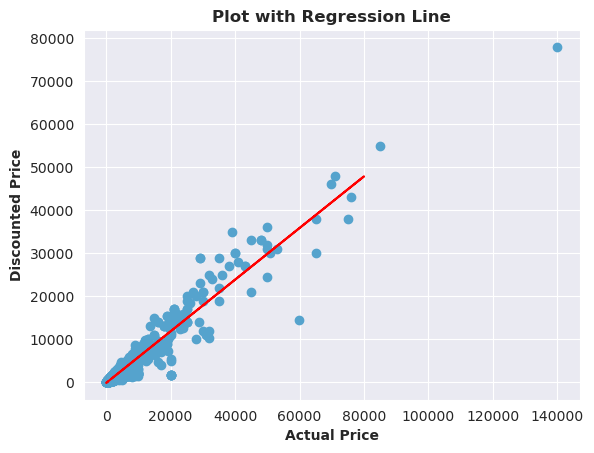

In [66]:
#Scatter Plot with Regression Line

plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Actual Price', fontweight='bold')
plt.ylabel('Discounted Price', fontweight='bold')
plt.title('Plot with Regression Line', fontweight='bold')
plt.show()


In [67]:
#Cross Validation Result

from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=10, shuffle=True, random_state=21)

cv_results = cross_val_score(reg, X, y, cv=kf)

print('Cross Validation Results Mean: ', cv_results.mean())

Cross Validation Results Mean:  0.9159405293663456


In [68]:
#Filling in some missing values from Rating Count Column

df1['rating_count'].fillna(df1['rating_count'].mode()[0], inplace=True)

In [69]:
#Lasso Regression

from sklearn.linear_model import Lasso

Xl = df1[['actual_price', 'rating', 'rating_count']]
yl = df1['discounted_price']

Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, yl, random_state = 21, test_size = 0.3)

lasso = Lasso(alpha = 0.1)
lasso.fit(Xl_train, yl_train)
ridge_predict = lasso.predict(Xl_test)
print('Lasso score: ',lasso.score(Xl_test, yl_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.9239335096300123
Lasso coefficients:  [5.95605560e-01 1.54610535e+02 4.03305120e-04]


In [70]:
#Ridge Regression

from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.1)
ridge.fit(Xl_train, yl_train)
ridge_predict = ridge.predict(Xl_test)
print('Ridge score: ',ridge.score(Xl_test, yl_test))

Ridge score:  0.923932503057468


In [71]:
#Linear Regression with 3 Predictors

reg2 = LinearRegression()
reg2.fit(Xl_train, yl_train)

yl_pred = reg2.predict(Xl_test)
print('R2 Score: ', r2_score(yl_test, yl_pred))

R2 Score:  0.9239323224150353


In [72]:
#Applying Preprocessing using Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X2 = df1[['actual_price', 'rating', 'rating_count']]
y2 = df1['discounted_price']

X2 = scaler.fit_transform(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state = 21, test_size = 0.3)

regss = LinearRegression()
regss.fit(X2_train, y2_train)

y2_pred = regss.predict(X2_test)
print('R2 Score: ', r2_score(y2_test, y2_pred))

R2 Score:  0.9239323224149191


# **Evaluating Simple Linear Regression Model**

There are a few requirements that must be met to make a successful Linear Regression Model

1. Linear Relationship between the dependent and independent variables
2. Normally distributed in error component
3. No multicollinearity, instability of regression coefficients
4. No heteroskedasticity, the variance the residuals must be constant across the predicted balues

In [73]:
ols_data = df1[['discounted_price', 'actual_price']]

The scatterplot of the actual price and discounted price in the Data Exploration section, shows that **there is a Linear Relationship.** Thus, this requirement is met.

In [74]:
ols_formula = 'discounted_price ~ actual_price'

In [75]:
#Importing ols function

from statsmodels.formula.api import ols

OLS = ols(formula = ols_formula, data=ols_data)
model = OLS.fit()

In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       discounted_price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 1.812e+04
Date:                Sun, 16 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:16:42   Log-Likelihood:                -13137.
No. Observations:                1465   AIC:                         2.628e+04
Df Residuals:                    1463   BIC:                         2.629e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -219.2597     55.486     -3.952      0.000    -328.099    -110.420
actual_price     0.6142      0.005    134.600      0.000       0.605       0.623
==============================================================================
Omnibus:                      521.405   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62749.178
Skew:                          -0.600   Prob(JB):                         0.00
Kurtosis:                      35.040   Cond. No.                     1.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The summary states that there is strong multicollinearity. If I were to use this linear regression model for a prediction it does not matter if it has a strong multicollinearity. This is the purpose of the Linear regression model, thus **the requirement has been met**.

If I were to use the linear regression model to measure the influence of the independent variable to the depedent variable, there must not have strong multicollinearity.

In [77]:
#Subset X Variable
X_ols = ols_data['actual_price']

#Get Prediction From Models
fitted_values = model.predict(X_ols)

#Calculate residuals
residuals = model.resid

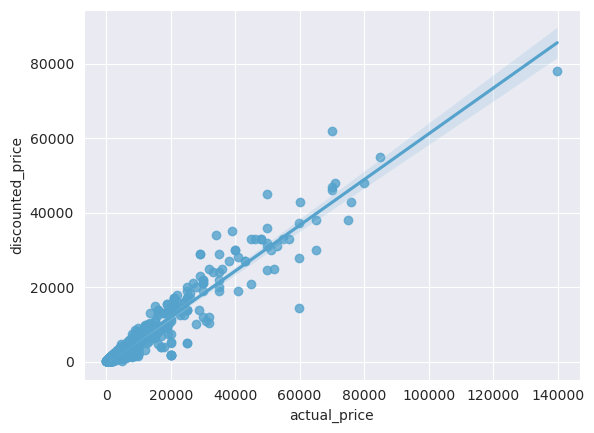

In [78]:
sns.regplot(data=ols_data, x='actual_price', y='discounted_price')

plt.show()

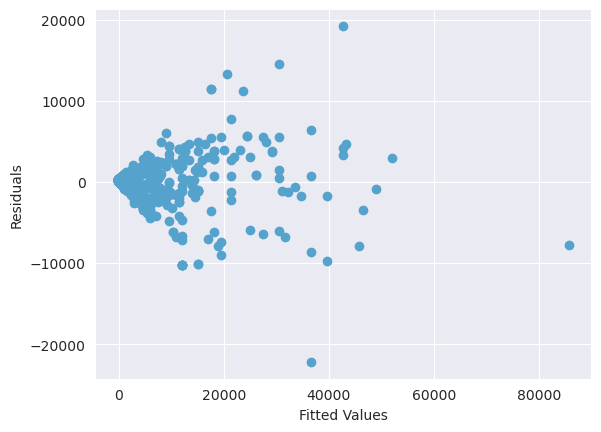

In [79]:
#Checking for Homoscedasticity

plt.scatter(fitted_values, residuals)

plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.show()

The above plot shows that is a Heteroscedasticity. This means that the **requirement for Linear Regression is NOT MET**.

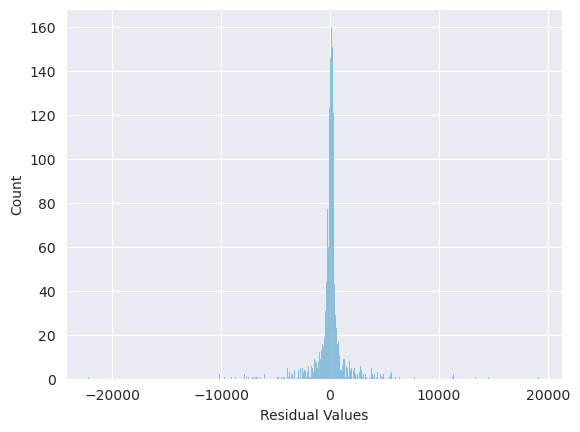

In [80]:
#Checking for Normal Distribution of the Error

ax = sns.histplot(residuals)
ax.set_xlabel('Residual Values')
plt.show()

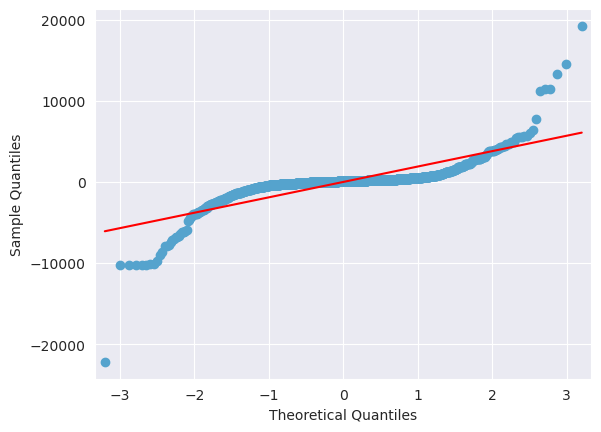

In [81]:
#Quantile-Quantile Plot

import statsmodels.api as sm

ax = sm.qqplot(model.resid, line='s')

plt.show()

To check for normal distribution of the error, the data points need to be close to the line. From the above plot we can see that there are many data points that are further from the line. This requirement of **linear regression is Not Met**.

In conclusion, there are more than two requirements that are not met for the Linear Regression Model. The requirements are 

1. No heteroskedasticity
2. Normally distributed Error component


**Thus this Simple Linear Regression Model should not be used.**

# **Sentiment Analysis**

For the Sentiment Analysis, I will be using the **VADER Sentiment Scoring**. Specifically, using NLTK's Sentiment Intensity Analyzer to get the negative/neutral/positive scores of the text.

In [82]:
#Subsetting Reviews

df3 = df[['product_id','review_title','review_content']]

In [83]:
pip install twython

Note: you may need to restart the kernel to use updated packages.


In [84]:
#importing packages for Sentiment Analysis

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [85]:
#Running the polarity Score on the entire dataset
res = {}

for i, row in tqdm(df3.iterrows(), total=len(df3)):
    review_desc =row['review_content']
    myid = row['product_id']
    res[myid] = sia.polarity_scores(review_desc)

  0%|          | 0/1465 [00:00<?, ?it/s]

In [86]:
pol_score = pd.DataFrame(res).T
pol_score = pol_score.reset_index().rename(columns={'index' : 'product_id'})

pol_score

,product_id,neg,neu,pos,compound
0,B07JW9H4J1,0.032,0.744,0.224,0.9033
1,B098NS6PVG,0.010,0.821,0.169,0.9853
2,B096MSW6CT,0.000,0.641,0.359,0.6808
3,B08HDJ86NZ,0.028,0.800,0.172,0.8316
4,B08CF3B7N1,0.101,0.717,0.183,0.9916
...,...,...,...,...,...
1346,B08L7J3T31,0.016,0.763,0.221,0.9468
1347,B01M6453MB,0.122,0.714,0.164,0.7876
1348,B009P2LIL4,0.083,0.718,0.199,0.9698
1349,B00J5DYCCA,0.061,0.882,0.057,-0.2960


In [87]:
#Merging the Dataframe with Polarity Score

df4 = df1.merge(pol_score, how='left')

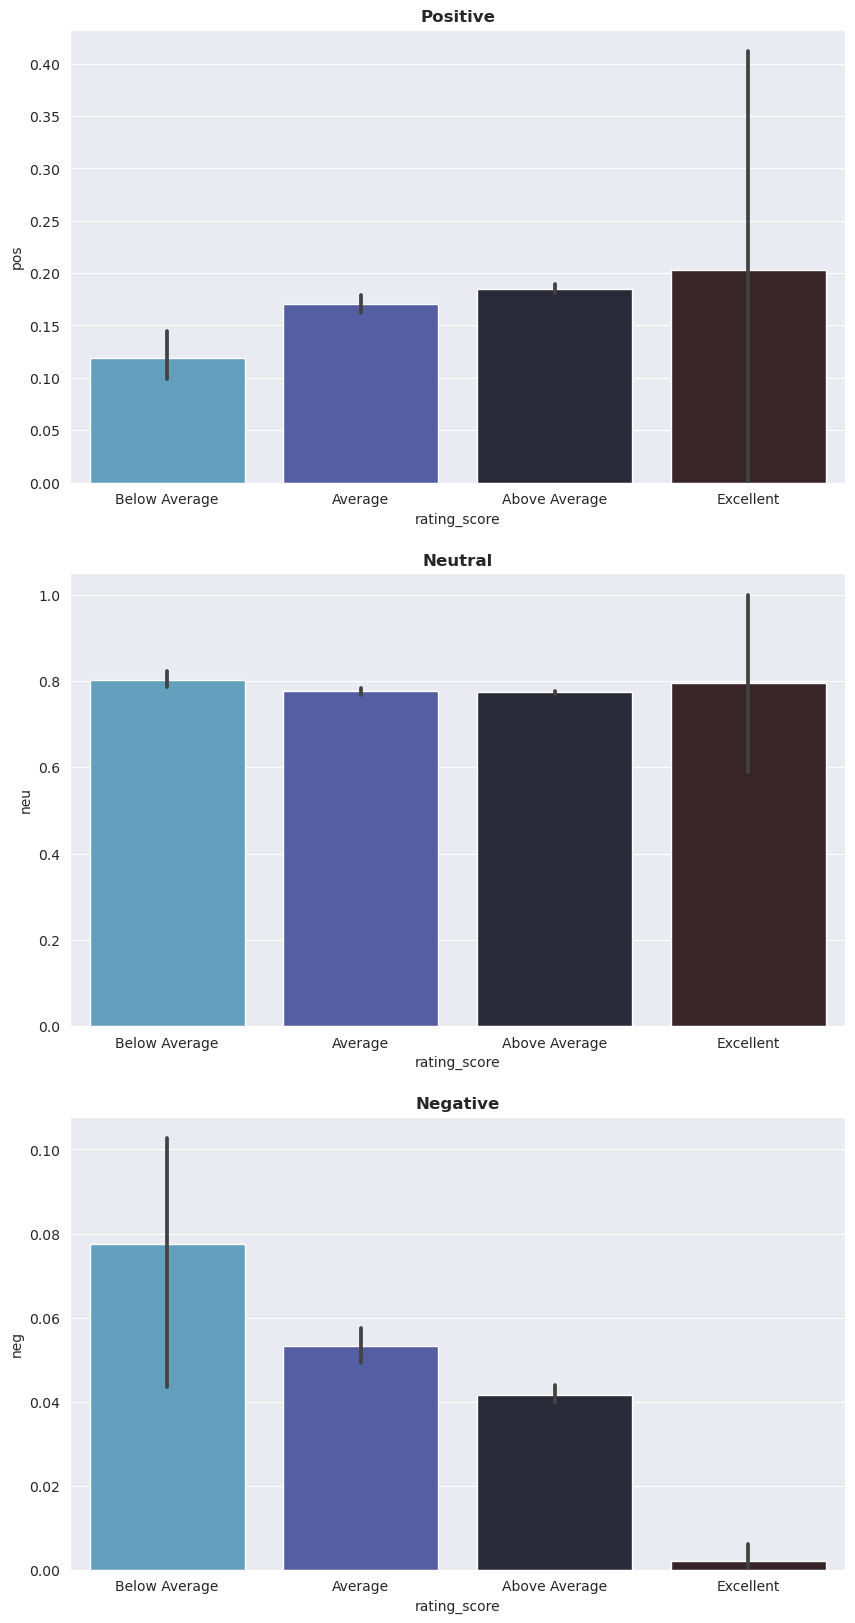

In [88]:
#Comparing Results of the Sentiment Analysis with the Rating 

fig, ax = plt.subplots(3,1, figsize=(10,20))

sns.barplot(data=df4, x='rating_score', y='pos', ax=ax[0])
sns.barplot(data=df4, x='rating_score', y='neu', ax=ax[1])
sns.barplot(data=df4, x='rating_score', y='neg', ax=ax[2])

ax[0].set_title('Positive', fontweight = 'bold')
ax[1].set_title('Neutral', fontweight = 'bold')
ax[2].set_title('Negative', fontweight = 'bold')

plt.show()

From the Sentiment Analysis, we can see that the **amount of positive words** being used in reviews as the rating goes up **increases**.

The **amount of negative words** being used in reviews as the rating goes up **drastically decreases**.

In [89]:
#Statistical Description on the Sentiment Score

sentiment_score = df4[['pos', 'neu', 'neg', 'compound']]
sentiment_score.describe()[1:7]

,pos,neu,neg,compound
mean,0.181514,0.774021,0.044465,0.823359
std,0.073551,0.071469,0.036994,0.362241
min,0.000000,0.465000,0.000000,-0.983500
25%,0.131000,0.734000,0.019000,0.871900
50%,0.172000,0.782000,0.039000,0.960900
75%,0.224000,0.822000,0.063000,0.987900


We can conclude that most of the reviews given by reviewers contains mostly positive reviews with an **average compound score of 96%**

In [90]:
df4.to_csv('Amazon Cleaned Version 4')